Imagine yourself on Titanic. You heard the news - the ship is sinking! Will you survive to tell the story?

# Background

According to [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic) the ship carried 2,224 passengers and crew. Titanic carried lifeboats for only 1,178 people. At 11:40 ship time she hit an iceberg. The disaster resulted in more than 1,500 lost lifes. During the evacuation "women and children first" policy was adopted.

# Getting our hands Tidy

![Tidy Data Science Process](./assets/tidy-process.png)

Let's see what our environment looks like:

In [1]:
version

               _                           
platform       x86_64-apple-darwin16.7.0   
arch           x86_64                      
os             darwin16.7.0                
system         x86_64, darwin16.7.0        
status                                     
major          3                           
minor          4.1                         
year           2017                        
month          06                          
day            30                          
svn rev        72865                       
language       R                           
version.string R version 3.4.1 (2017-06-30)
nickname       Single Candle               

## Importing the data

The training and test data is provided by [Kaggle](https://www.kaggle.com/c/titanic) in csv format. [Description](https://www.kaggle.com/c/titanic/data) of the variables is also available. Let's load it into R and have a peek.

In [2]:
library(tidyverse)
library(forcats) # factors munging
library(stringr) # string manipulation
library(ggthemes) # visualization
library(scales) # visualization
library(party) # random forest

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



In [3]:
train <- read_csv("data/train.csv")

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Survived = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


891 rows and 12 columns in our training set. But who the passengers really are? Let's delve a bit deeper...

### Visualize (skip transform)

In [4]:
glimpse(train)

Observations: 891
Variables: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0...
$ Pclass      <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3...
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley ...
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "...
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 1...
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1...
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0...
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", ...
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.86...
$ Cabin       <chr> NA, "C85", NA, "C123", NA, NA, "E46", NA, NA, NA, "G6",...
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", ...


In [5]:
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


In [6]:
summary(train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

#### Survival rate

In [7]:
summarise(train, SurvivalRate = sum(Survived) / nrow(train))

SurvivalRate
0.3838384


### Model

Our first model is pretty simple - we predict that everyone perish:

In [8]:
test <- read_csv("data/test.csv")
model <- tibble(PassengerID = test$PassengerId, Survived = 0)
write_csv(model, "models/baseline.csv")

Parsed with column specification:
cols(
  PassengerId = col_integer(),
  Pclass = col_integer(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_integer(),
  Parch = col_integer(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)


## How much gender affects survival rate?

### Transform

Change survived to *yes* and *no*:

In [9]:
titanic <- train %>%
                mutate(Survived = factor(Survived)) %>%
                mutate(Survived = fct_recode(Survived, "No" = "0", "Yes" = "1"))

Normalize the sex column:

In [10]:
titanic <- titanic %>%
        mutate(Sex = factor(Sex)) %>%
        mutate(Sex = fct_recode(Sex, "Female" = "female", "Male" = "male"))

### Visualize

In [11]:
options(repr.plot.width=7, repr.plot.height=5)

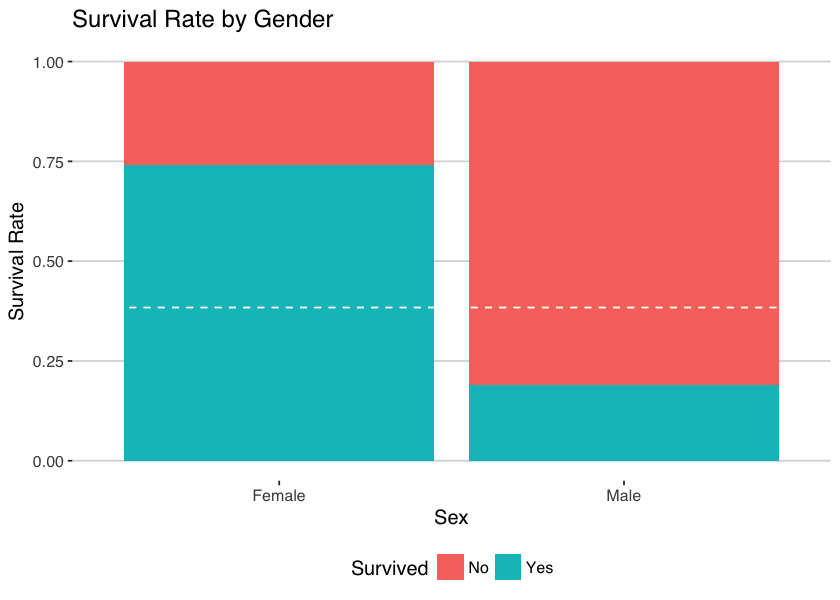

In [12]:
ggplot(titanic, aes(Sex, fill=Survived)) +
            geom_bar(position = "fill") +
            ylab("Survival Rate") +
            geom_hline(yintercept = (sum(train$Survived)/nrow(train)), col = "white", lty = 2) +
            ggtitle("Survival Rate by Gender") +
            theme_hc() +
            scale_colour_hc()

### Model

Our second model is simple, still. We predict that all (and only) women survive.

In [13]:
model <- tibble(PassengerID = test$PassengerId, Survived = ifelse(test$Sex == 'female', 1, 0))
write_csv(model, "models/females_survive.csv")

## What social status does passangers have?

### Transform

Let's try to extract person titles and try to group them based on that

In [14]:
titanic <- titanic %>%
    mutate(Title = str_sub(Name, str_locate(Name, ",")[ , 1] + 2, str_locate(Name, "\\.")[ , 1] - 1))

### Visualize

In [15]:
titanic %>% group_by(Title) %>%
              summarise(count = n()) %>%
              arrange(desc(count))

Title,count
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Major,2
Mlle,2
Capt,1


## Are mothers more likely to survive?

### Transform

In [16]:
titanic <- titanic %>% 
    mutate(Mother = factor(
        ifelse(
            c(
                titanic$Title == "Mrs" | 
                titanic$Title == "Mme" | 
                titanic$Title == "the Countess" | 
                titanic$Title == "Dona" | 
                titanic$Title == "Lady"
            ) & titanic$Parch > 0, 
            "Yes", "No"
            )
        )
    )

### Visualize

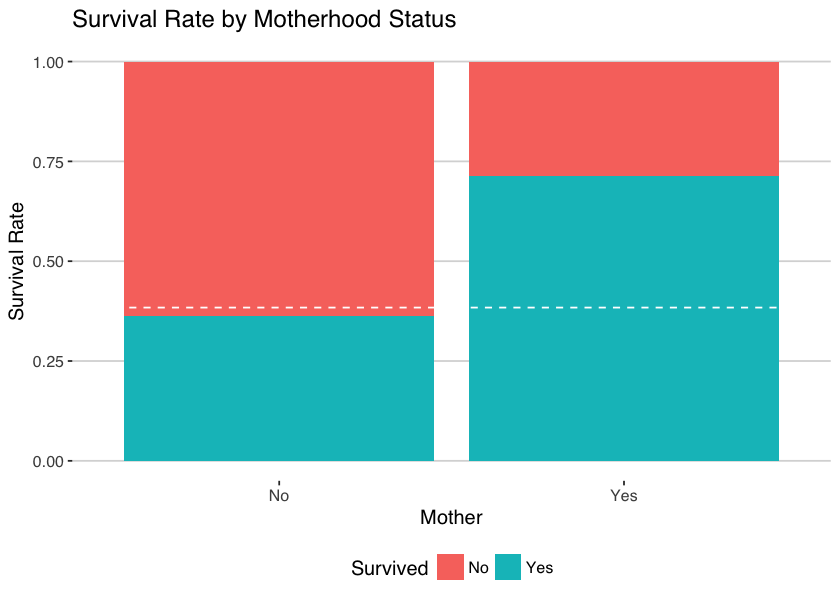

In [17]:
ggplot(titanic, aes(x = Mother, fill = Survived)) +
    geom_bar(position = "fill") +
    ylab("Survival Rate") +
    geom_hline(yintercept = (sum(train$Survived)/nrow(train)), col = "white", lty = 2) +
    ggtitle("Survival Rate by Motherhood Status") +
    theme_hc() +
    scale_colour_hc()

## Does social status influence the chance of survival?

### Transform

In [18]:
titanic <- titanic %>%
    mutate(Title = factor(Title)) %>%
    mutate(Title = fct_collapse(Title, 
                                "Miss" = c("Mlle", "Ms"), 
                                "Mrs" = "Mme",
                                "Ranked" = c( "Major", "Dr", "Capt", "Col", "Rev"),
                                "Royalty" = c("Lady", "the Countess", "Don", "Sir", "Jonkheer"))) 

### Visualize

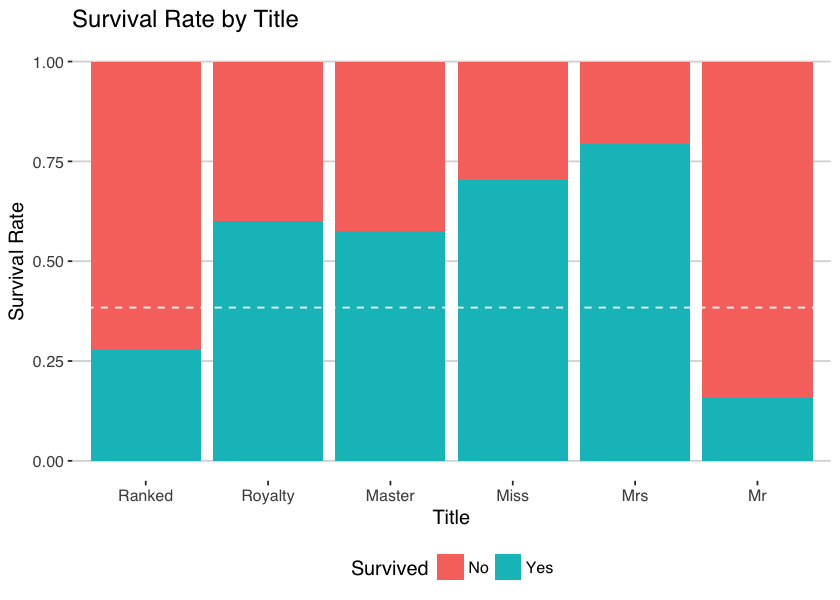

In [19]:
ggplot(titanic, aes(x = Title, fill = Survived)) +
        geom_bar(position = "fill") +
        ylab("Survival Rate") +
        geom_hline(yintercept = (sum(train$Survived)/nrow(train)), col = "white", lty = 2) +
        ggtitle("Survival Rate by Title") +
        theme_hc() +
        scale_colour_hc()

## Does being part of a family help?

Let define 3 types of families - Large (more than 4 members), Medium (more than 1 but less than 5 members)  and Single (1 member).

### Transform

In [20]:
titanic <- titanic %>% 
    mutate(FamilySize = SibSp + Parch + 1) %>% 
    mutate(FamilyType = 
        factor(
            ifelse(FamilySize > 4, 
                "Large", 
                ifelse(FamilySize == 1, 
                    "Single", 
                    "Medium"
                    )
              )
        )
    )

### Visualize

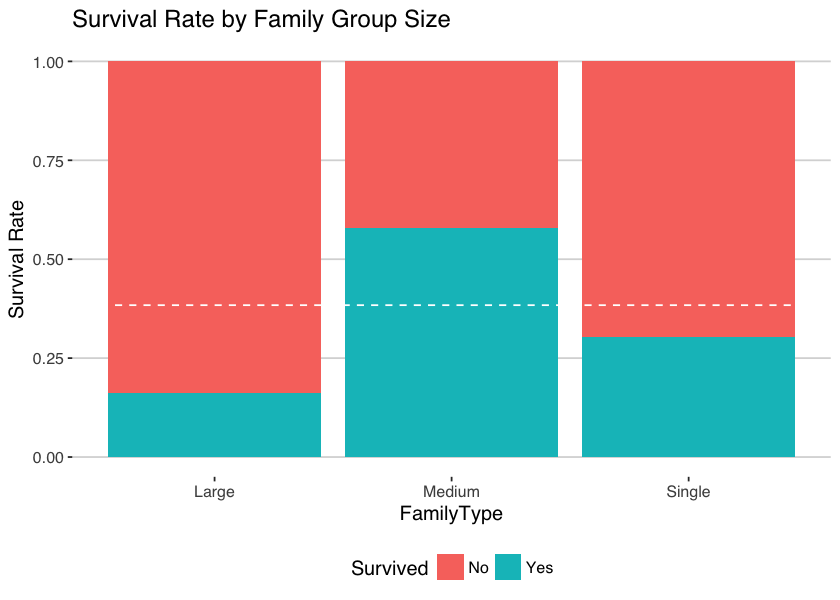

In [21]:
ggplot(titanic, aes(x = FamilyType, fill = Survived)) +
    geom_bar(position = "fill") +
    ylab("Survival Rate") +
    geom_hline(yintercept = (sum(train$Survived)/nrow(train)), col = "white", lty = 2) + 
    ggtitle ("Survival Rate by Family Group Size") +
    theme_hc() +
    scale_colour_hc()

## How likely are high class passangers to survive?

### Visualize

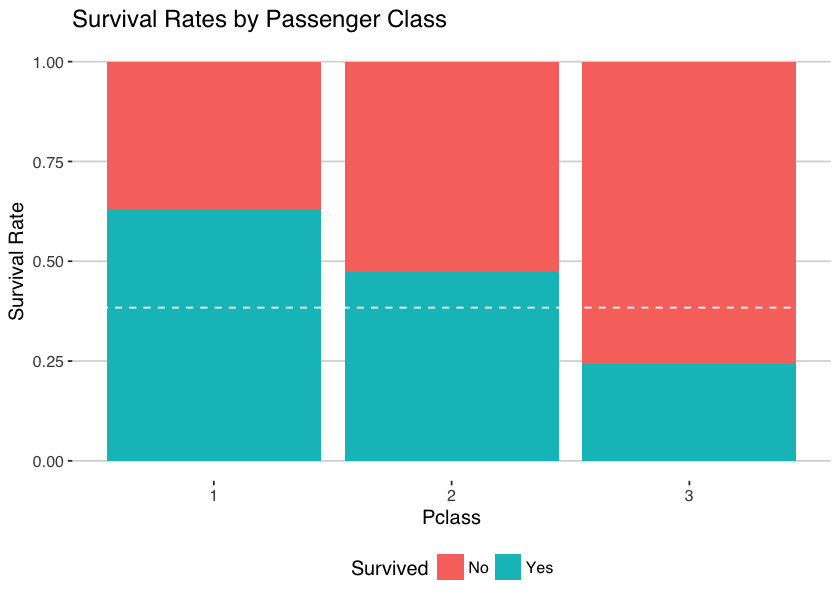

In [22]:
ggplot(titanic, aes(x = Pclass, fill = Survived)) +
    geom_bar(position = "fill") +
    ylab("Survival Rate") +
    geom_hline(yintercept = (sum(train$Survived)/nrow(train)), col = "white", lty = 2) +
    ggtitle("Survival Rates by Passenger Class") +
    theme_hc() +
    scale_colour_hc()

Warning message:
“Removed 15 rows containing non-finite values (stat_density).”

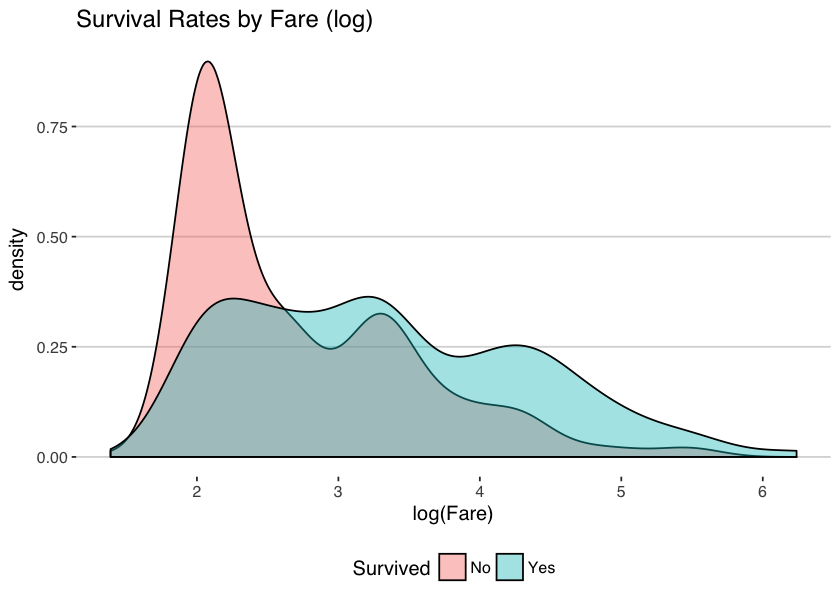

In [23]:
ggplot(titanic, aes(x = log(Fare), fill = Survived)) +
    geom_density(alpha = 0.4)  + 
    ggtitle("Survival Rates by Fare (log)") +
    theme_hc() +
    scale_colour_hc()

## Are younger passangers more likely to survive?

### Transform

Let break the age into three groups: Child (under 18), Adult and OAP (over 60):

In [24]:
titanic <- titanic %>% 
        mutate(LifeStage = factor(ifelse(Age < 18, "Child", ifelse(Age <= 60, "Adult", "OAP"))))

#### Visualize

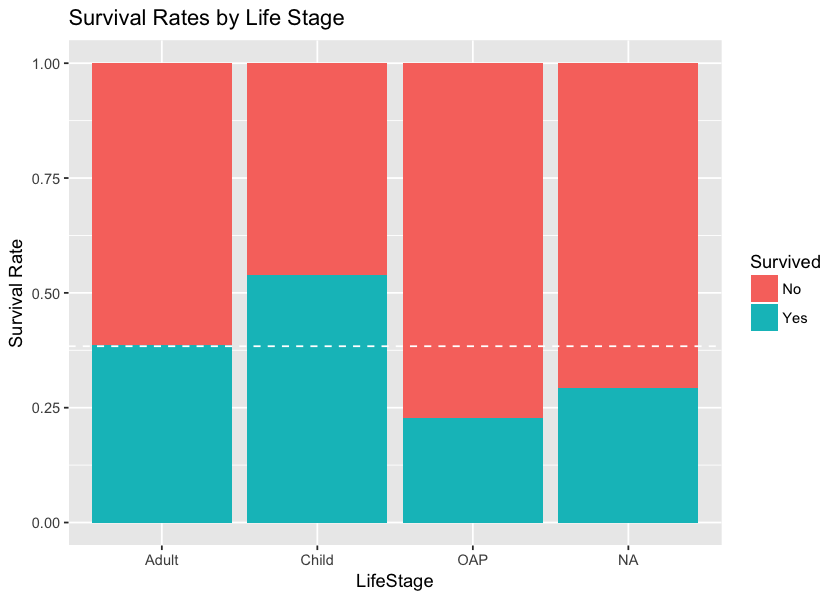

In [25]:
ggplot(titanic, aes(x = LifeStage, fill = Survived)) +
      geom_bar(position = "fill") +
      ylab("Survival Rate") +
      geom_hline(yintercept = (sum(train$Survived)/nrow(train)), col = "white", lty = 2) +
      ggtitle("Survival Rates by Life Stage")

### Model

Let's build a generalized linear model (GLM) using our data:

In [26]:
titanic <- titanic %>% 
        mutate(Fare = ifelse(Fare == 0, 0.001, Fare)) %>%
        mutate(LogFare = log(Fare))

In [40]:
train_data <- select(titanic, Survived, Pclass, Sex, LifeStage, LogFare)

In [41]:
train_glm <- glm(Survived ~ Pclass + Sex + LifeStage + LogFare, 
                 family = binomial, 
                 data = train_data)

In [42]:
summary(train_glm)


Call:
glm(formula = Survived ~ Title + Pclass + Sex + LifeStage + LogFare, 
    family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3513  -0.6596  -0.3740   0.6152   2.3705  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     16.33153  507.59234   0.032 0.974333    
TitleRoyalty    -0.40699    1.41887  -0.287 0.774231    
TitleMaster      2.68113    0.78515   3.415 0.000638 ***
TitleMiss      -12.33374  507.59201  -0.024 0.980614    
TitleMrs       -12.07544  507.59200  -0.024 0.981020    
TitleMr          0.28044    0.61677   0.455 0.649331    
Pclass          -1.24126    0.15348  -8.088 6.09e-16 ***
SexMale        -15.38213  507.59176  -0.030 0.975825    
LifeStageChild   0.20289    0.35037   0.579 0.562546    
LifeStageOAP    -1.00278    0.60777  -1.650 0.098955 .  
LogFare         -0.06286    0.08541  -0.736 0.461755    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



#### Prediction

First, we have to apply all our transformations to the test data:

In [72]:
titanic_test <- test %>%
        mutate(Sex = factor(Sex)) %>%
        mutate(Sex = fct_recode(Sex, "Female" = "female", "Male" = "male")) %>%
        mutate(LifeStage = factor(ifelse(Age < 18, "Child", ifelse(Age <= 60, "Adult", "OAP")))) %>%
        mutate(Fare = ifelse(Fare == 0, 0.001, Fare)) %>%
        mutate(LogFare = log(Fare))

In [73]:
test_data <- select(titanic_test, Pclass, Sex, LifeStage, LogFare)

In [75]:
p_hats <- predict.glm(train_glm, newdata = test_data, type = "response", na.action = na.pass)

In [76]:
survived_hat <- ifelse(is.na(p_hats) | p_hats <= 0.5, 0, 1)

In [77]:
model <- tibble(PassengerID = test$PassengerId, Survived = survived_hat)
write_csv(model, "models/glm.csv")

Can we do better?

### Model

Let's try with Conditional Random Forest model:

In [89]:
cf_model <- cforest(Survived ~ Pclass + Sex + LifeStage + LogFare,
                 data = train_data, 
                 controls = cforest_unbiased(ntree = 1000, mtry = 3))

#### Evaluation

In [90]:
table(predict(cf_model), train_data$Survived)

     
       No Yes
  No  506  97
  Yes  43 245

In [91]:
varimp(cf_model)

Title      Pclass         Sex   LifeStage     LogFare 
0.148373089 0.079987768 0.069944954 0.005235474 0.026660550

In [92]:
cf_predictions <- predict(cf_model, test_data, OOB=TRUE, type="response")
cf_predictions <- ifelse(cf_predictions == "No", 0, 1)

In [93]:
model <- tibble(PassengerID = test$PassengerId, Survived = cf_predictions)
write_csv(model, "models/crf.csv")